<img src="", width=150, ALIGN="left", border=20>
<center>
<h1>Air Quality Challenge Starting Kit</h1>
<br>This code was tested with <br>
Python 2.7.13 | Anaconda 4.3.1 (https://anaconda.org/)<br>
<a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science (CDS)</a>
</center>

ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 

# Introduction

The Air Quality challenge is a regression problem inspired from the Kaggle challenge <a href="https://www.kaggle.com/nelsonchu/air-quality-in-northern-taiwan">Air Quality in Northern Taiwan</a>, formatted in the AutoML format. 


In [8]:
model_dir = 'sample_code_submission/'          
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'

from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h1> Step 1: Exploratory data analysis </h1>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.

In [9]:
datadir = 'sample_data'              # Change this to the directory where you put the input data
dataname = 'air'
!ls $datadir*

air_feat.name	 air_test.data	    air_train.solution
air_label.name	 air_test.solution  air_valid.data
air_public.info  air_train.data     air_valid.solution


In [10]:
cv=[0.498,0.612,0.762,0.834,0.664]
train=[0.637,0.619,0.765,0.964,0.786]
valid=[0.1603,0.652,0.762,0.835,0.666]
nox_tes=[0.45,  0.16, 1,  0.12 , 0.2]
cible_2=[14,  5, 31,  4 , 6]
#datavi=np.array([[0.498,0.612,0.762,0.834,0.664],[0.637,0.619,0.765,0.964,0.786],[0.1603,0.652,0.762,0.835,0.666]])
datavi=np.array([cv,train,valid])
#print(datavi)
print("%%%%%%%%%%%%%%%%%%%")
tdatavi=datavi.transpose()
print(tdatavi)


%%%%%%%%%%%%%%%%%%%
[[0.498  0.637  0.1603]
 [0.612  0.619  0.652 ]
 [0.762  0.765  0.762 ]
 [0.834  0.964  0.835 ]
 [0.664  0.786  0.666 ]]


In [11]:
#ar = np.array([[1.1, 2, 3.3, 4], [2.7, 10, 5.4, 7], [5.3, 9, 1.5, 15]])
#df = pd.DataFrame(ar, index = ['a1', 'a2', 'a3'], columns = ['A', 'B', 'C', 'D'])
datavi_df=pd.DataFrame(tdatavi,index=['GaussClassifier','LinearRegression','DecisionTee','RandonForestF','NearestNeightbors'], columns=['Crosvalisdation','trainingdData','validation'])


In [12]:
datavi_5variable=data_5test.head()
#print(datavi_5variable)
wd_hr=[0.37,0.5,1,0.71,0.45]
nox_norme5=[0.45,  0.16, 1,  0.12 , 0.2]
datavi_5variable['WD_HR']=wd_hr
datavi_5variable['NOx']=nox_norme5
print(datavi_5variable)
datavi_5variabletrans=datavi_5variable.T
#print(datavi_5variable.T)
#datavi_5variabletrans.columns = [x.lower() for x in datavi_5variable.columns]
#datavicomparee=
#datavi_compare=pd.DataFrame(datavi_5variable, index=['5emeligne','6iemeligne','7iemeligne','8iemeligne','9iemeligne'],columns=['CH4','CO','WD_HR','UVB','NOx'])

NameError: name 'data_5test' is not defined

In [13]:
datavi_comparee=((np.asarray(datavi_5variable)).reshape(5,5))
#print(datavi_comparee)
datavi_5variable_df=pd.DataFrame(datavi_comparee, index=['5emeligne','6iemeligne','7iemeligne','8iemeligne','9iemeligne'],columns=['CH4','CO','WD_HR','UVB','NOx'])
print(datavi_5variable_df)

NameError: name 'datavi_5variable' is not defined

In [14]:

print(datavi_df)

                   Crosvalisdation  trainingdData  validation
GaussClassifier              0.498          0.637      0.1603
LinearRegression             0.612          0.619      0.6520
DecisionTee                  0.762          0.765      0.7620
RandonForestF                0.834          0.964      0.8350
NearestNeightbors            0.664          0.786      0.6660


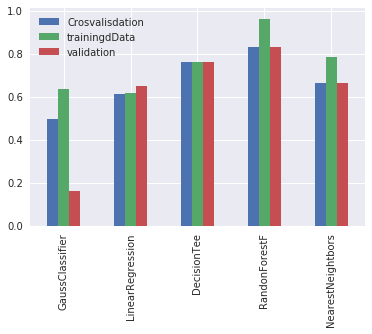

In [15]:
datavi_df.plot.bar();

In [16]:
datavi_5variable_df.plot.bar();

NameError: name 'datavi_5variable_df' is not defined

In [ ]:
datavi_df.plot.barh(stacked=True);

In [17]:
datavi_5variable_df.plot.barh(stacked=True);

NameError: name 'datavi_5variable_df' is not defined

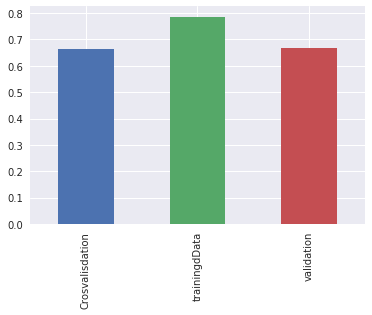

In [18]:
plt.figure();
datavi_df.iloc[4].plot(kind='bar');

In [19]:
plt.figure();
datavi_5variable_df.iloc[4].plot(kind='bar');

NameError: name 'datavi_5variable_df' is not defined

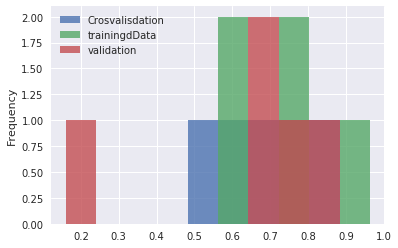

In [20]:
plt.figure();
datavi_df.plot.hist(alpha=0.8)

In [21]:
plt.figure();
datavi_5variable_df.plot.hist(alpha=0.8)

NameError: name 'datavi_5variable_df' is not defined

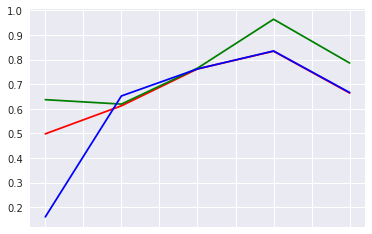

In [22]:
plt.figure()
with pd.plotting.plot_params.use('x_compat', True):
     datavi_df.Crosvalisdation.plot(color='r')
     datavi_df.trainingdData.plot(color='g')
     datavi_df.validation.plot(color='b')  

In [23]:
datavi_nox=datavi_df
noxNorme=[0.45,  0.16, 1,  0.12 , 0.2]
datavi_nox['NOx']=noxNorme
print(datavi_nox)

                   Crosvalisdation  trainingdData  validation   NOx
GaussClassifier              0.498          0.637      0.1603  0.45
LinearRegression             0.612          0.619      0.6520  0.16
DecisionTee                  0.762          0.765      0.7620  1.00
RandonForestF                0.834          0.964      0.8350  0.12
NearestNeightbors            0.664          0.786      0.6660  0.20


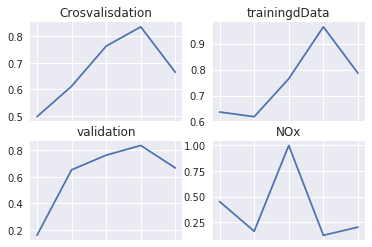

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2)

datavi_nox['Crosvalisdation'].plot(ax=axes[0,0]); axes[0,0].set_title('Crosvalisdation');

datavi_nox['trainingdData'].plot(ax=axes[0,1]); axes[0,1].set_title('trainingdData');

datavi_nox['validation'].plot(ax=axes[1,0]); axes[1,0].set_title('validation');

datavi_nox['NOx'].plot(ax=axes[1,1]); axes[1,1].set_title('NOx');

NameError: name 'datavi_5variable_df' is not defined

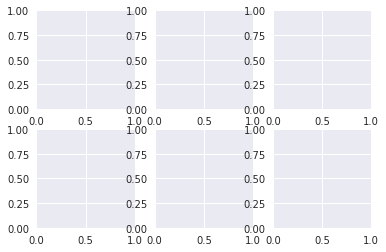

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=3)

datavi_5variable_df['CH4'].plot(ax=axes[0,0]); axes[0,0].set_title('CH4[5-10lignes]');

datavi_5variable_df['CO'].plot(ax=axes[0,1]); axes[0,1].set_title('CO[5-10ligne]');

datavi_5variable_df['WD_HR'].plot(ax=axes[0,2]); axes[0,2].set_title('WD_HR[5-10lignes]');

datavi_5variable_df['UVB'].plot(ax=axes[1,0]); axes[1,0].set_title('UVB[5-10ligne]');

datavi_5variable_df['NOx'].plot(ax=axes[1,1]); axes[1,1].set_title('NOx[5-10ligne]');

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)


datavi_df['Crosvalisdation'].plot(ax=axes[0,1]); axes[0,1].set_title('CrosValidation');
datavi_df['trainingdData'].plot(ax=axes[1,0]); axes[1,0].set_title('TrainingData');
datavi_df['validation'].plot(ax=axes[1,1]); axes[1,1].set_title('Validation');



In [ ]:
datavi_df.plot(subplots=True, figsize=(6, 6))

In [26]:
datavi_5variable_df.plot(subplots=True, figsize=(6, 6))

NameError: name 'datavi_5variable_df' is not defined

In [27]:
#ax = datavi_df.plot.scatter(x='validation', y='trainingdData et ', color='DarkBlue', label='training vs validatuin');
#datavi_df.plot.scatter(x='validation', y='Crosvalisdation', color='DarkGreen', label='crosvalidation vs validation', ax=ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56af2fef90>,
      dtype=object)

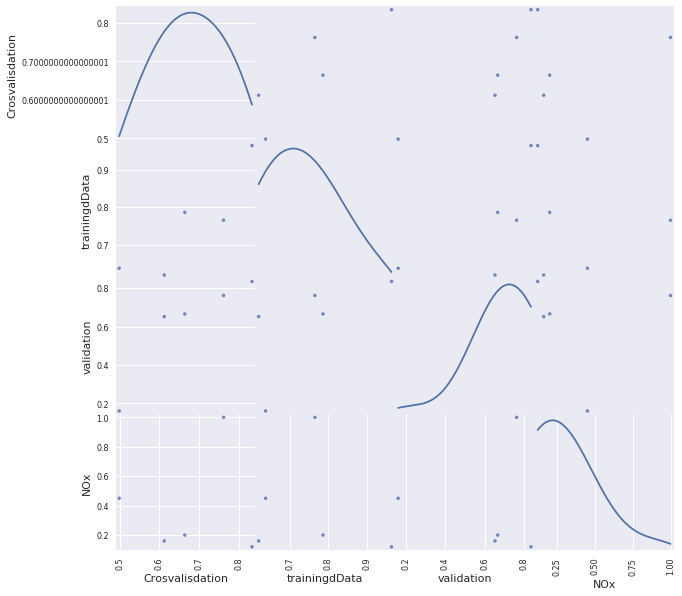

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(datavi_df, alpha=0.8, figsize=(10, 10), diagonal='kde')

In [29]:
#scatter_matrix(datavi_5variable_df, alpha=0.8, figsize=(10, 10), diagonal='kde')

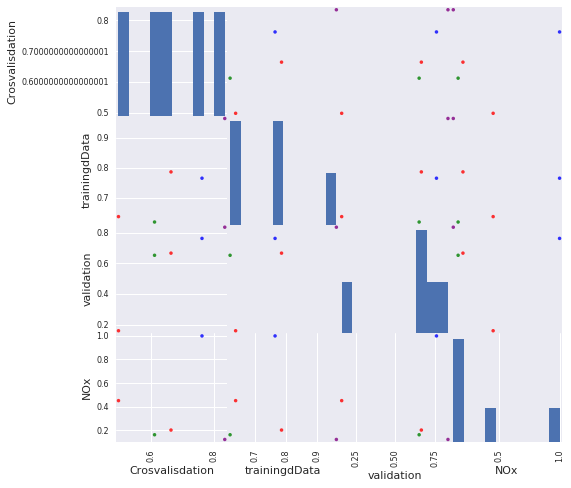

In [30]:

colors_palette = {0: "red", 1: "green", 2: "blue",3:"purple"}
colors = [colors_palette[c] for c in range(4)]   
matrix_of_scatterplots = scatter_matrix(datavi_nox, alpha=0.8, figsize=(8, 8), color=colors, diagonal='hist')

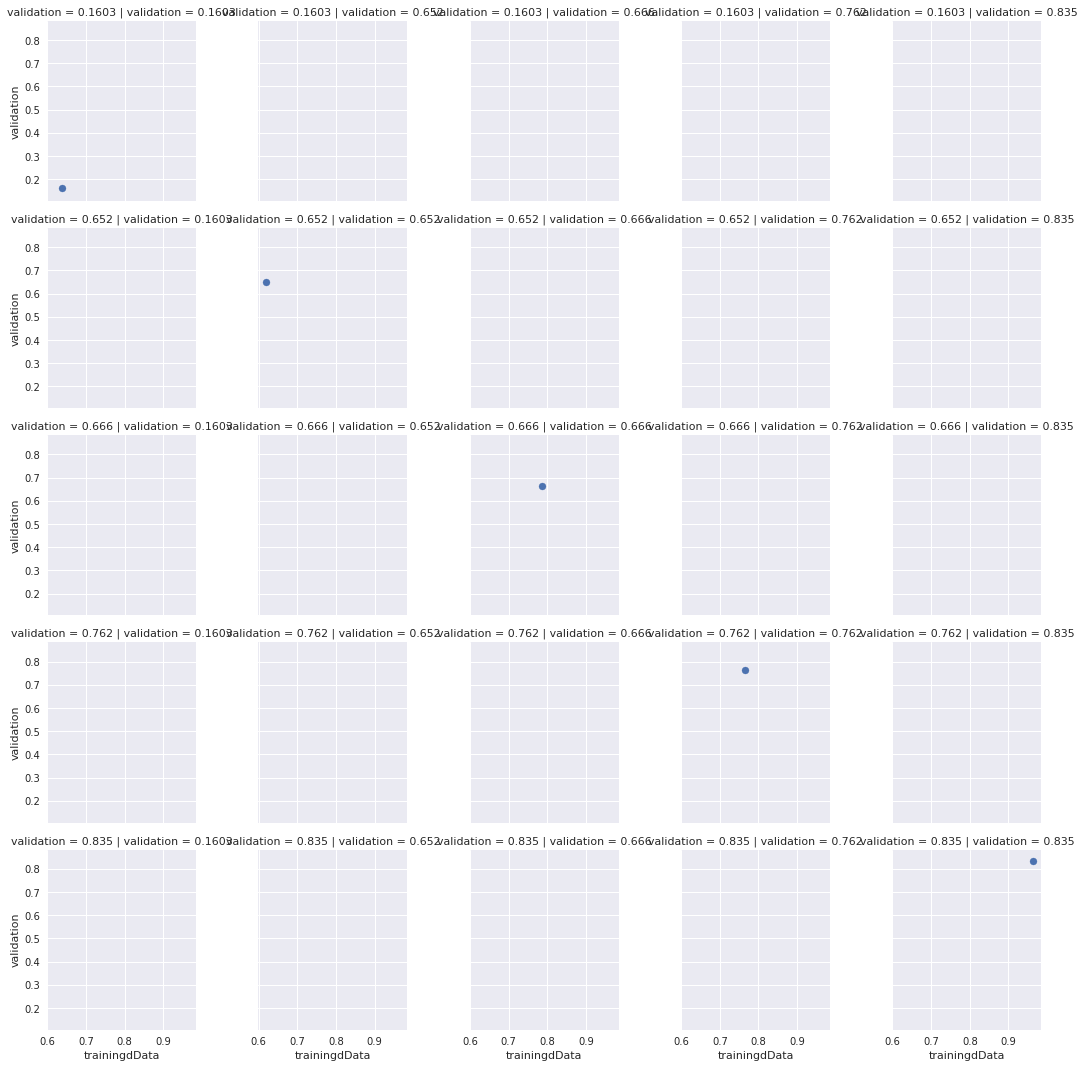

In [31]:
g = sns.FacetGrid(datavi_nox, row="validation", col="validation")
g.map(plt.scatter, "trainingdData", "validation")

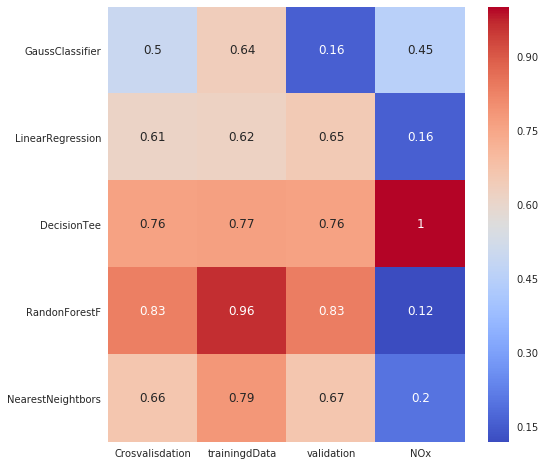

In [32]:
f,ax=plt.subplots(figsize=(8,8))
p = sns.heatmap(datavi_nox, cmap='coolwarm', annot=True)

NameError: name 'datavi_5variable_df' is not defined

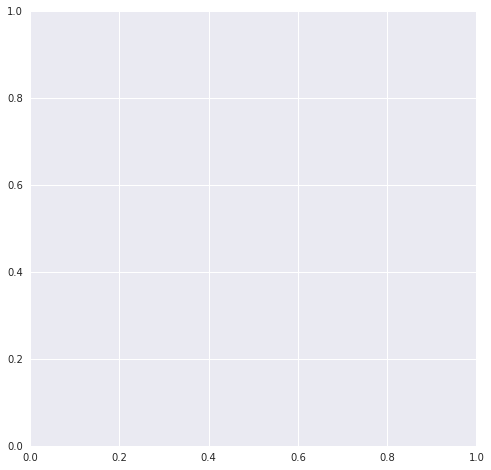

In [33]:
f,ax=plt.subplots(figsize=(8,8))
p = sns.heatmap(datavi_5variable_df, cmap='coolwarm', annot=True)

In [ ]:
p = sns.heatmap(datavi_nox,
                cmap='coolwarm',
                annot=True,
                fmt=".1f",
                annot_kws={'size':10},
                cbar=False,
                square=True)


In [ ]:

plt.rcParams['font.size'] = 20
bg_color = (0.88,0.85,0.95)
plt.rcParams['figure.facecolor'] = bg_color
plt.rcParams['axes.facecolor'] = bg_color
fig, ax = plt.subplots(1)
p = sns.heatmap(datavi_nox,
                cmap='coolwarm',
                annot=True,
                fmt=".1f",
                annot_kws={'size':16},
                ax=ax)
plt.xlabel('donnees')
plt.ylabel('Methodes')
ax.set_ylim((0,15))
plt.text(5,12.3, "Heat Map", fontsize = 95, color='Black', fontstyle='italic')


In [ ]:


plt.rcParams['font.size'] = 20
bg_color = (0.88,0.85,0.95)
plt.rcParams['figure.facecolor'] = bg_color
plt.rcParams['axes.facecolor'] = bg_color
fig, ax = plt.subplots(1)
p = sns.heatmap(datavi_5variable_df,
                cmap='coolwarm',
                annot=True,
                fmt=".1f",
                annot_kws={'size':16},
                ax=ax)
plt.xlabel(' 5-10ieme de data')
plt.ylabel('Les variables  ')
ax.set_ylim((0,15))
plt.text(5,12.3, "Heat Map", fontsize = 95, color='Black', fontstyle='italic')


In [ ]:
x1 = [1, 2, 2,,2, 3, 4, 4, 4, 4, 4, 5, 5]
x2 = [1, 1, 1, 2, 2, 3, 3, 3, 3, 4, 5, 5,5 ]
bins = [x + 0.5 for x in range(0, 6)]
plt.hist([x1, x2], bins = bins, color = ['yellow', 'green'],
            edgecolor = 'red', hatch = '/', label = ['x1', 'x2'],
            histtype = 'bar') # bar est le defaut
plt.ylabel('valeurs')
plt.xlabel('nombres')
plt.title('2 series')
plt.legend()

In [ ]:
print(datavi_nox)

In [ ]:
print(datavi_df)

In [ ]:
f,ax=plt.subplots(figsize=(18,15))
sns.heatmap(datavi_df.corr() ,cmap='Greens',annot=True)

In [ ]:
f,ax=plt.subplots(figsize=(18,15))
sns.heatmap(datavi_nox.corr() ,cmap='Greens',annot=True)

In [ ]:
 f,ax=plt.subplots(figsize=(10,10))
ax = sns.heatmap(datavi_nox, cmap='Purples',annot=True, fmt="f")

NameError: name 'datavi_5variable_df' is not defined

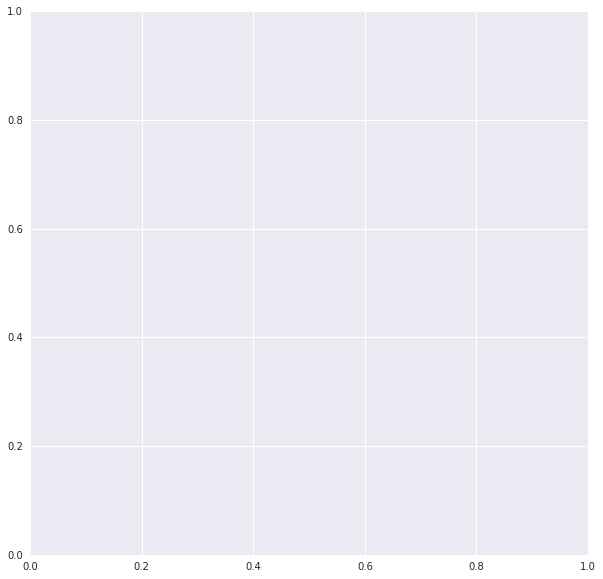

In [34]:
 f,ax=plt.subplots(figsize=(10,10))
ax = sns.heatmap(datavi_5variable_df, cmap='Purples',annot=True, fmt="f")

In [ ]:
#import matplotlib.pyplot as plt
datavi_nox.options.display.mpl_style = 'default'
datavi_nox.boxplot()

In [35]:
#x = sns.heatmap(datavi_nox, cmap="YlGnBu")

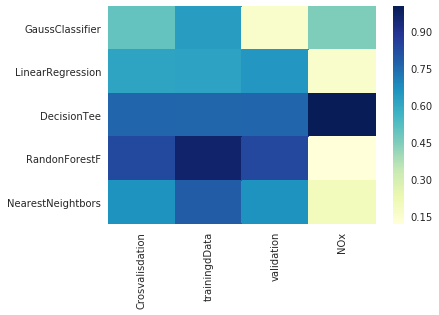

In [36]:
x = sns.heatmap(datavi_nox, cmap="YlGnBu")

In [37]:
x = sns.heatmap(datavi_5variable_df, cmap="YlGnBu")

NameError: name 'datavi_5variable_df' is not defined

NameError: name 'data' is not defined

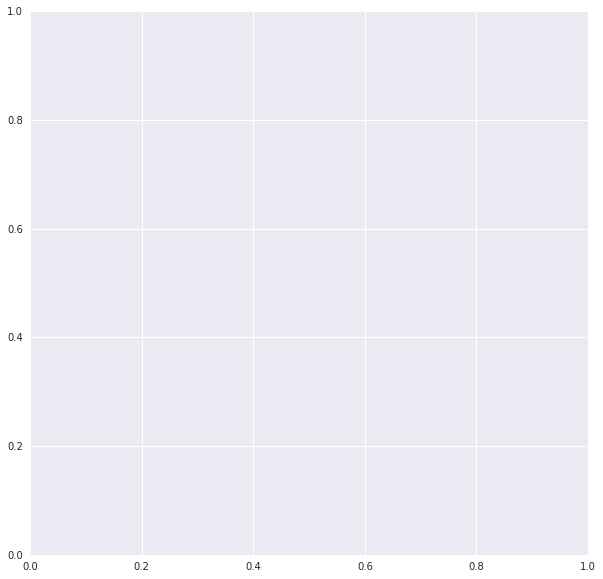

In [38]:
 f,ax=plt.subplots(figsize=(10,10))
x = sns.heatmap(data, cmap="YlGnBu")

In [39]:
sns.countplot(x="CH4", data=data,order=range(25), palette="Greens_d");#histograme de variable

NameError: name 'data' is not defined

For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data. YOU MIGHT WANT TO KEEP THIS UNTIL THE NEXT YELLOW BLOCK.

In [40]:
print(dataname)

air


In [41]:
UVB=((np.asarray(data['UVB'])).reshape(20,25))
print(UVB)

NameError: name 'data' is not defined

In [42]:
datavi_5variable=data_5test.head()
#print(datavi_5variable)
wd_hr=[0.37,0.5,1,0.71,0.45]
nox_norme5=[0.45,  0.16, 1,  0.12 , 0.2]
datavi_5variable['WD_HR']=wd_hr
datavi_5variable['NOx']=nox_norme5
print(datavi_5variable)
datavi_5variabletrans=datavi_5variable.T
#print(datavi_5variable.T)
#datavi_5variabletrans.columns = [x.lower() for x in datavi_5variable.columns]
#datavicomparee=
#datavi_compare=pd.DataFrame(datavi_5variable, index=['5emeligne','6iemeligne','7iemeligne','8iemeligne','9iemeligne'],columns=['CH4','CO','WD_HR','UVB','NOx'])

NameError: name 'data_5test' is not defined

In [43]:
datavi_comparee=((np.asarray(datavi_5variable)).reshape(5,5))
#print(datavi_comparee)
#datavi_5variable_df=pd.DataFrame(datavi_comparee, index=['5emeligne','6iemeligne','7iemeligne','8iemeligne','9iemeligne'],columns=['CH4','CO','WD_HR','UVB','NOx'])
print(datavi_5variable_df)

NameError: name 'datavi_5variable' is not defined

In [44]:
datavi_5variable_df.plot.bar();

NameError: name 'datavi_5variable_df' is not defined

In [45]:

ar = np.array([[1.1, 2, 3.3, 4], [2.7, 10, 5.4, 7], [5.3, 9, 1.5, 15]])
df = pd.DataFrame(ar, index = ['a1', 'a2', 'a3'], columns = ['A', 'B', 'C', 'D'])

print(df)
print("%%%%%%%%%%%%%%%")
print (df['B'])

print("%%%%%%%%%%%%%%%")
#print (df['a1'])

      A     B    C     D
a1  1.1   2.0  3.3   4.0
a2  2.7  10.0  5.4   7.0
a3  5.3   9.0  1.5  15.0
%%%%%%%%%%%%%%%
a1     2.0
a2    10.0
a3     9.0
Name: B, dtype: float64
%%%%%%%%%%%%%%%


In [46]:
from data_io import read_as_df
data = read_as_df(datadir  + '/' + dataname)                # The data are loaded as a Pandas Data Frame
target_name = data.columns.values[-1]       # The last column is the target
#target_namea = data.columns.values[1] 
#target_nameb = data.columns.values[13]  

Reading sample_data/air_train from AutoML format
Number of examples = 500
Number of features = 14
Number of labels = 1


In [47]:
print(len(data))

500


In [48]:
data[:5]

,AMB_TEMP,CH4,CO,NMHC,O3,PM10,RH,SO2,THC,UVB,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,NOx
0,16,1,0,0,35,62,61,4,2,1,77,78,5,4,14
1,32,1,0,0,19,11,73,0,1,1,102,98,2,2,5
2,23,1,0,0,26,23,91,2,2,1,204,220,1,1,31
3,13,1,0,0,55,45,95,0,2,1,145,145,2,1,4
4,20,1,0,0,42,44,48,1,2,1,92,85,1,1,6


In [49]:
data.columns

Index([u'AMB_TEMP', u'CH4', u'CO', u'NMHC', u'O3', u'PM10', u'RH', u'SO2',
       u'THC', u'UVB', u'WD_HR', u'WIND_DIREC', u'WIND_SPEED', u'WS_HR',
       u'NOx'],
      dtype='object')

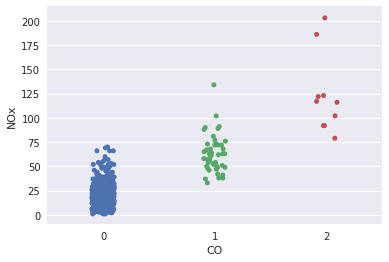

In [50]:
sns.stripplot(x="CO", y="NOx",  data=data,jitter=True )

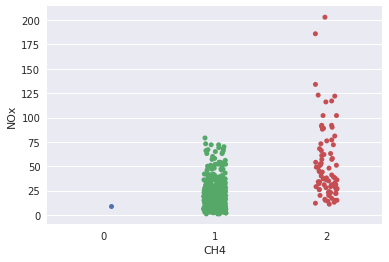

In [51]:
sns.stripplot(x="CH4", y="NOx",  data=data,jitter=True )

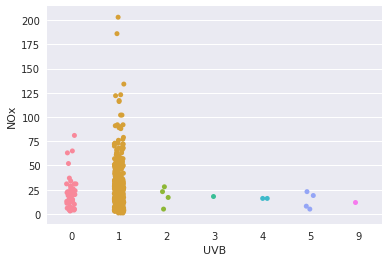

In [52]:
sns.stripplot(x="UVB", y="NOx",  data=data,jitter=True )

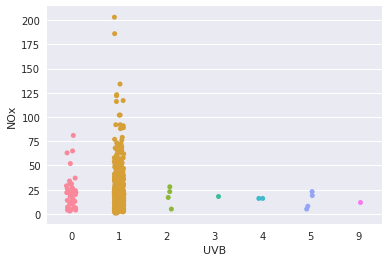

In [53]:
sns.stripplot(x="UVB", y="NOx",  data=data,jitter=True )

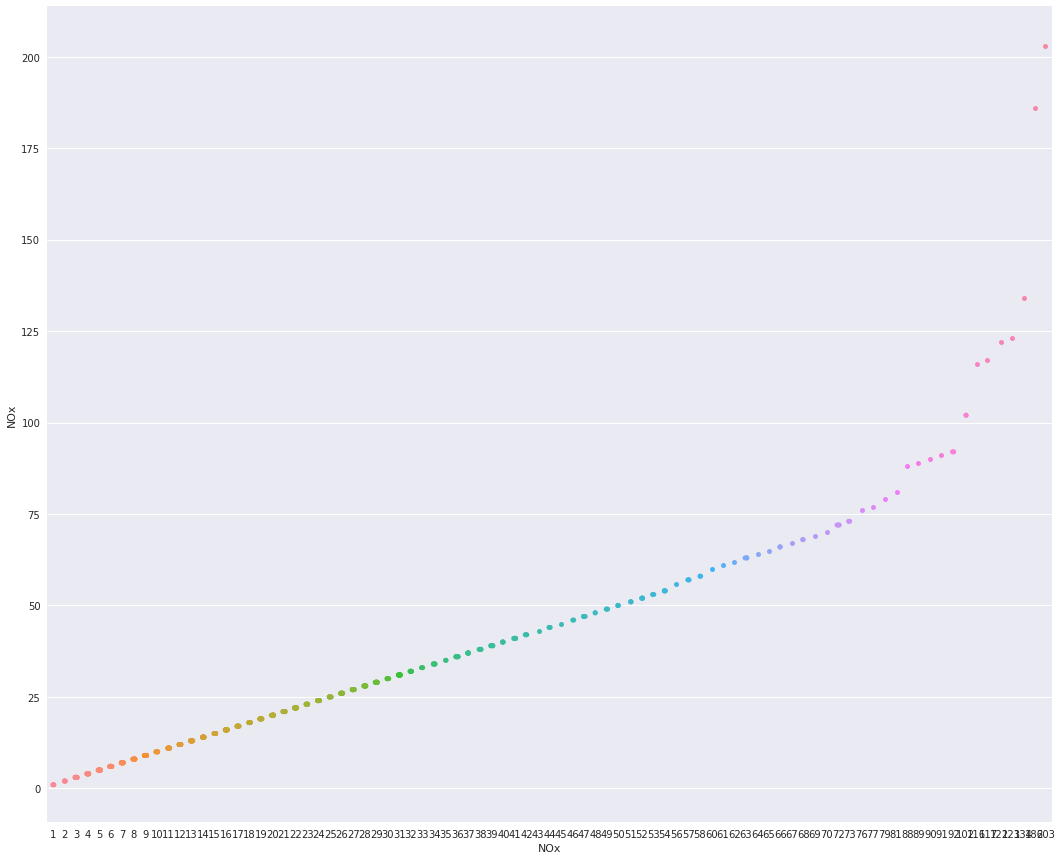

In [54]:
f,ax=plt.subplots(figsize=(18,15))
sns.stripplot(x="NOx", y="NOx",  data=data,jitter=True )

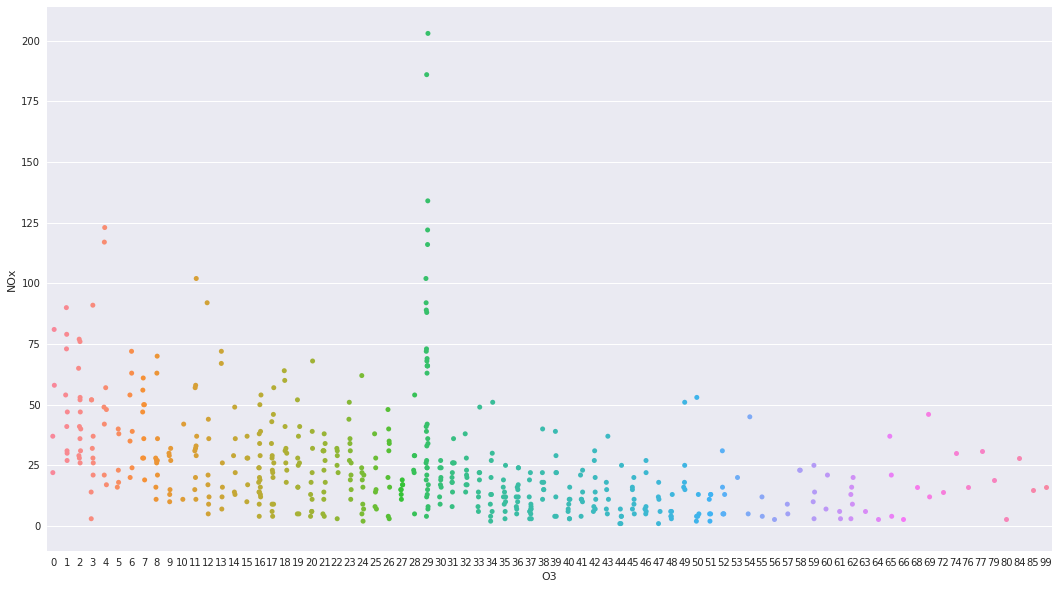

In [55]:
f,ax=plt.subplots(figsize=(18,10))
sns.stripplot(x="O3", y="NOx",  data=data,jitter=True )

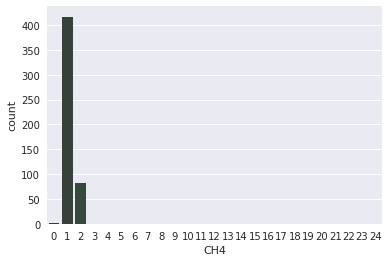

In [56]:
sns.countplot(x="CH4", data=data,order=range(25), palette="Greens_d");#histograme de variable

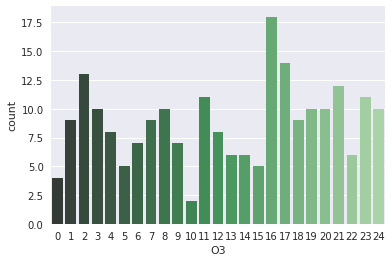

In [57]:
# AMB_TEMP  CH4  CO  NMHC  O3  PM10  RH  SO2  THC  UVB  WD_HR  WIND_DIREC
sns.countplot(x="O3", data=data,order=range(25), palette="Greens_d")#histograme de variable

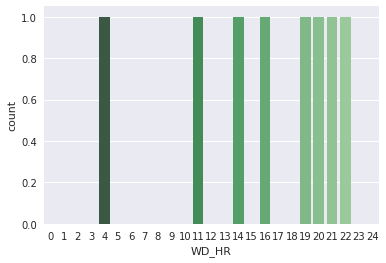

In [58]:
sns.countplot(x="WD_HR", data=data,order=range(25), palette="Greens_d");

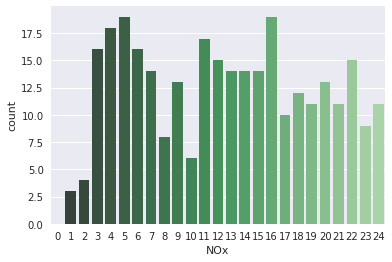

In [59]:
sns.countplot('NOx',data=data,order=range(25),palette="Greens_d")

#sns.countplot(x="NOx", data=data,order=rang(25) palette="Greens_d");

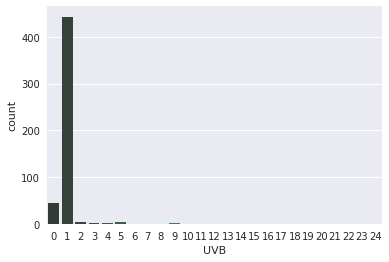

In [60]:
sns.countplot(x="UVB", data=data,order=range(25), palette="Greens_d")

In [61]:
print(target_name)

NOx


In [62]:
#data.head(50)

In [63]:
print(target_name )

NOx


In [64]:
print(target_name)

NOx


In [65]:
UVB=((np.asarray(data['UVB'])).reshape(20,25))
print(UVB)

[[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1]
 [1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 2 1 5 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 5 1 9 1]
 [0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 4 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 5]
 [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 0 2 1 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1]
 [1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 0 1 0 1 1]
 [1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 5 

In [66]:
ch4=((np.asarray(data['CH4'])).reshape(20,25))
print(ch4)

[[1 1 1 1 1 2 1 2 2 1 2 1 1 1 2 2 1 1 1 1 1 2 2 1 1]
 [1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1]
 [1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 2 1 1 1 1]
 [1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1]
 [1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1]
 [2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1]
 [1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1]
 [1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1]
 [1 2 1 1 2 1 2 1 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1 2]
 [1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2]
 [1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 1 2 1 1 2]
 [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 2 1]
 [1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1]
 [1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1]
 [1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1]
 [1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1]
 [1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 2 2 1 2 1 2 1 0 1 1 1 1 1 2 1 1 1 1 1 1]
 [1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [67]:
nox=((np.asarray(data['NOx'])).reshape(20,25))
print(nox)
print(np.max(nox))

[[ 14   5  31   4   6  90  23 102  52  34  66  11  47  36  51 102  20   6
   11   5  19  29  76   4  66]
 [ 38  58  14   4  15  22  21  17   8  20   6  20   5   3  37   3  15  13
   40   4  12  29  44  20  22]
 [ 46  46  13  28  16  31  31  18  23  12  22  24  88   4  16  29  60  14
   20  24 134  35   5  21  19]
 [ 10  12  57  31  11   2  15   5  21  21   5  11  17  19   8  15  11  29
   63  11  21  48  15  16  13]
 [ 32  39  45  18  24  16  19  10  27  15  67  22   3  14   9   6  11  23
   16  21  11  14  18  52  29]
 [116   6   9  22  65  49  31   7  26   4  19  22  38   8  25   9  42   4
   41   4  34  34  31  40  19]
 [ 47  14  34  18   9  21   9   5   4  50  30  39   5  21  32   4   3  30
   17  30   5  11  29  13  24]
 [ 11  25  16  53  48   6  14  81  22  23  29  18  12   6  19  12  18   7
   15  23  41  19  52  12   7]
 [ 24  38   9  56  27   3  57   3   7   9  28  34  26  12  15  15  16  30
   27  16  16   5   5  73 122]
 [ 14  36  29   7  27  30  12  28  27  44  32  77  26  

In [68]:
print(nox.shape)
nox_test=nox[0][0:5]
print(nox_test)

(20, 25)
[14  5 31  4  6]


In [69]:
#import pandas as pd
nox_df=pd.DataFrame(nox); 
o3_df=pd.DataFrame(o3)
print(nox_df)

NameError: name 'o3' is not defined

In [ ]:
#co=((np.asarray(data['CO'])).reshape(20,25))
#ch4=((np.asarray(data['CH4'])).reshape(20,25))
#print(co," ",ch4)  
#result=co_df.pivot(index='RH',columns="UVB", values='CH4')
#labels=(np.asarray(["{0}\n {1:.2f}".format(symb,value) for symb,value in zip(co.flatten(),ch4.flatten())])).reshape(20,25)

#title="alhas"
#fig,ax=plt.subplots(figsize=(12,7))
#plt.title(title,fontsize=18)
#tt1=ax.title

#tt1.set_position([0.5,1.05])
#ax.set_xticks([])
#ax.set_yticks([])
#ax.axis('off')
#sns.heatmap(co_df,fmt="",cmap='RdY1Gn',linewidths=0.3,ax=ax)
#plt.show()

In [ ]:
f,ax=plt.subplots(figsize=(18,15))
sns.heatmap(data.corr() ,cmap='Greens',annot=True) # fait par lee matrice de cofusion

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(12,12))
r = sns.heatmap(datavi_5variable_df, cmap='BuPu')
r.set_title("Heatmap of Flight Density from 1949 to 1961")


In [ ]:

import seaborn
seaborn.set(font="monospace")

cmap = seaborn.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)

seaborn.clustermap(data.corr(), linewidths=.5, figsize=(13, 13), cmap=cmap)



In [ ]:
#f,ax=plt.subplots(figsize=(18,15))
#sns.heatmap(nox_df.corr() ,cmap='Greens',annot=True) # fait par lee matrice de cofusion

In [ ]:
#f,ax=plt.subplots(figsize=(18,15))
#sns.heatmap(co_df.corr() ,cmap='Greens',annot=True)

In [ ]:
#f,ax=plt.subplots(figsize=(18,15))
#sns.heatmap(o3_df.corr() ,cmap='Greens',annot=True)

In [ ]:
from sklearn.metrics import confusion_matrix
#conf = confusion_matrix()

#air_feat.name	 air_test.data	    air_train.solution
#air_label.name	 air_test.solution  air_valid.data
#air_public.info  air_train.data     air_valid.solution


In [ ]:
print(data[0:5])

In [ ]:
datavi_5ligne=data[5:10]
data_5test=data[['CH4','CO','WD_HR','UVB','NOx']]
print(data_5test)

In [ ]:
datavi_5variable=data_5test.head()
print(datavi_5variable)

In [ ]:
print(data[5:10])

In [ ]:
data.hed

In [ ]:
data.describe() 

We can see here the correlation matrix, which shows how correlated each columns are with each others.

The column 'NOx' is the column we wish to predict, in this case, we can see high correlation with 'CO', 'NMHC' and 'CH4'.

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(data.corr(), cmap='inferno')
plt.xticks(np.arange(data.columns.shape[0])+0.5,data.columns, rotation=90)
plt.yticks(np.arange(data.columns.shape[0])+0.5,data.columns, rotation=0)
plt.show()

With the histograms, we see that the most columns are of a 'gaussian' nature. Except some such as 'PM10', which are more like a poisson law. Which depending on your algorithm could cause problems.

In [ ]:
data.hist(figsize=(20, 10), bins=50, layout=(3, 5));

In [ ]:
for i in range(len(data.columns.values)-1):
    sns.jointplot(x="NOx", y=data.columns.values[i], data=data)

# Step 2: Building a predictive model


## Loading data with DataManager
We reload the data with the AutoML DataManager class because this is more convenient:

In [ ]:
from data_manager import DataManager
D = DataManager(dataname, datadir, replace_missing=True)
print (D)

## Training a predictive model
We provide an example of predictive model (regression) in the `sample_code_submission/` directory. It's a simple decision tree regressor. Find a better model and replace it.

In [ ]:
from model import model
??model 

<h3>Create or reload model</h3>
Create an instance of the model (run the constructor) and attempt to reload a previously saved model from `sample_code_submission/*_model.pickle` if `reload_model=1`.<br>
If you saved have an aldeady trained model saved in sample_code_submission, the evaluation script will reload it and not retrain, just test. This will happen the second time you run the code because when the model is trained it gets saved. <br>
When you reload a model, you risk to reload a model trained on the wrong data. Delete `*_model.pickle` from `sample_code_submission/` if you do not want this to happen.

In [ ]:
M = model()   
reload_model=0                       # Change to 1 to reload an already trained model

trained_model_name = model_dir + dataname
if reload_model:    
    M = M.load(trained_model_name)                  # Attempts to re-load an already trained model

<h3> Training:</h3>

In [ ]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']

if not(M.is_trained):                               # No need to train if model already trained
    M.fit(X_train, Y_train)  
print (X_train)
print( len(X_train))
print("%%%%%%%%%%%%%%")
print(Y_train)
print(len(Y_train))

### Making predictions:

In [ ]:
Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

### Saving:
Save the trained model (will be ready to reload next time around) and save the prediction results:

In [8]:
M.save(trained_model_name)                 
result_name = 'sample_result_submission/' + dataname
from data_io import write
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

NameError: name 'M' is not defined

## Scoring the results
### Load the challenge metric
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. We use here the `r2_metric` metric (an example of organizer-supplied metric found in `my_metric.py`), which computes the coefficient of determination. 

In [9]:
with open(score_dir + '/metric.txt', 'r') as f:
    metric_name = f.readline().strip()
import libscores, my_metric
try:
    scoring_function = getattr(libscores, metric_name)
except:
    scoring_function = getattr(my_metric, metric_name)
print ('Using scoring metric:', metric_name)
??scoring_function

Using scoring metric: r2_regression


### Training performance
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions. 

In [10]:
Y_train =  Y_train.ravel() # We need this conversion to a line vector

NameError: name 'Y_train' is not defined

In [ ]:
print ('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print ('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))

In [ ]:
from sklearn.model_selection import KFold
from numpy import zeros, mean
# 5-fold cross-validation
n = 5
kf = KFold(n_splits=n)
kf.get_n_splits(X_train)
i=0
scores = zeros(n)
for train_index, test_index in kf.split(X_train):
    Xtr, Xva = X_train[train_index], X_train[test_index]
    Ytr, Yva = Y_train[train_index], Y_train[test_index]
    M = model()
    M.fit(Xtr, Ytr)
    Yhat = M.predict(Xva)
    scores[i] = scoring_function(Yva, Yhat)
    print ('Fold', i+1, 'example metric = ', scores[i])
    i=i+1
print ('Average score = ', mean(scores))

# Step 3: Making a submission

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 

In [146]:
outdir = 'sample_result_submission'     

In [147]:
!python $problem_dir/ingestion.py $datadir $outdir $problem_dir $model_dir

Using input_dir: /home/baalhassane/Bureau/mini_projet/nature/final_starting_kit/sample_data
Using output_dir: /home/baalhassane/Bureau/mini_projet/nature/final_starting_kit/sample_result_submission
Using program_dir: /home/baalhassane/Bureau/mini_projet/nature/final_starting_kit/ingestion_program
Using submission_dir: /home/baalhassane/Bureau/mini_projet/nature/final_starting_kit/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Air ********
************************************************
========= Reading and converting data ==========
Info file found : /home/baalhassane/Bureau/mini_projet/nature/final_starting_kit/sample_data/air_public.info
========= Reading /home/baalhassane/Bureau/mini_projet/nature/final_starting_kit/sample_data/air_feat.type
[+] Success in  0.00 sec
========= Reading /home/baalhassane/Bureau/mini_projet/nature/final_starting_kit/sample_data/air_train.data
[+] S

## Preparing the submission

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.